<a href="https://colab.research.google.com/github/jojivk/hello-world/blob/master/Ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
x=tf.ones(shape=(2,1))
print(x)
x=tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [5]:
x=tf.random.normal(shape=(3,1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.7347071 ]
 [-0.47906724]
 [ 0.08540957]], shape=(3, 1), dtype=float32)


In [7]:
x=tf.random.uniform(shape=(3,1), minval=0, maxval=3.0)
print(x)

tf.Tensor(
[[1.6812197]
 [1.9730043]
 [2.4084702]], shape=(3, 1), dtype=float32)


In [12]:
import numpy as np
x=np.ones(shape=(2,2))
x[0,0]=0.

v=tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.0908688 ],
       [-1.255135  ],
       [-0.51861775]], dtype=float32)>


In [14]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [15]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [16]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [17]:
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a,b)
e *=d

In [18]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result=tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [19]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [21]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time **2
  speed = inner_tape.gradient(position, time)
acceleration= outer_tape.gradient(speed, time)

An end-to-end example: A linear classifier in pure Tensorflow
Generating two classes of random points in a 2D plane.

In [25]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)

**Stacking the two classes into an array with shape(2000,2)**

In [27]:
inputs=np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [29]:
targets = np.vstack((np.zeros((num_samples_per_class,1), dtype="float32"),
                     np.ones((num_samples_per_class,1), dtype="float32")))

**Plotting the two point classes**

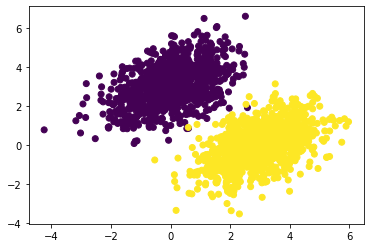

In [31]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

**Create the linear classifier variables**

In [33]:
input_dim =2
output_dim =1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [34]:
def model(inputs):
  return tf.matmul(inputs,W) +b

**The mean squared error loss function**

In [35]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

**The training step function**

In [42]:
learning_rate=0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss= square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

**The batch training loop**

In [43]:
for step in range(40):
  loss=training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.5800
Loss at step 1: 0.1271
Loss at step 2: 0.0955
Loss at step 3: 0.0868
Loss at step 4: 0.0812
Loss at step 5: 0.0764
Loss at step 6: 0.0720
Loss at step 7: 0.0680
Loss at step 8: 0.0644
Loss at step 9: 0.0611
Loss at step 10: 0.0581
Loss at step 11: 0.0553
Loss at step 12: 0.0528
Loss at step 13: 0.0505
Loss at step 14: 0.0484
Loss at step 15: 0.0464
Loss at step 16: 0.0447
Loss at step 17: 0.0431
Loss at step 18: 0.0416
Loss at step 19: 0.0403
Loss at step 20: 0.0391
Loss at step 21: 0.0380
Loss at step 22: 0.0370
Loss at step 23: 0.0360
Loss at step 24: 0.0352
Loss at step 25: 0.0344
Loss at step 26: 0.0337
Loss at step 27: 0.0331
Loss at step 28: 0.0325
Loss at step 29: 0.0320
Loss at step 30: 0.0315
Loss at step 31: 0.0310
Loss at step 32: 0.0306
Loss at step 33: 0.0303
Loss at step 34: 0.0299
Loss at step 35: 0.0296
Loss at step 36: 0.0293
Loss at step 37: 0.0291
Loss at step 38: 0.0288
Loss at step 39: 0.0286


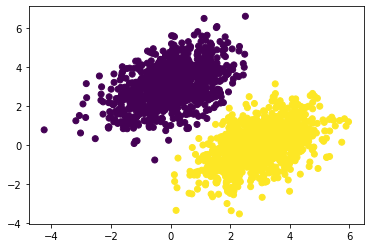

In [48]:
predictions=model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

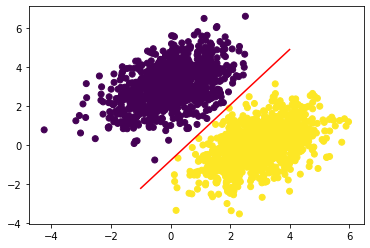

In [49]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] *x + (0.5 - b) /W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:,0], inputs[:, 1], c=predictions[:,0] > 0.5)

**Layers: The building blocks of deep learning**




In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
  def __inint__(self, units, actication=None):
    super().__init__()
    self.units=units
    self.activation=activation